# **분류**

- 데이터가 어느 범주(category)에 해당하는지 판단. 

- 유사한 것들을 같은 범주로 묶으면 주변에서 일어나는 일을 빠르게 판단하는데 도움. 

- 알고리즘의 퍼포먼스 측정방법 비교:

    - 회귀: SSE(잔차 제곱의 합, Sum of Squared Error) --실수, 
             MSE(잔차 제곱의 평균, Mean of Squared Error) --실수
          
    - 분류: 정확도(예측이 정답을 얼마나 맞혔는지) --%
    
- 분류문제에는 명확한 답이 없는 경우도 있다. --비지도학습(Unsupervised Learning)

## **5.1 이항분류**

- 이항분류(Binary Classification): 정답의 범주가 2개.

In [16]:
#색깔 정보없이 숫자만 보고 레드/화이트 구분하기

# 5.1 와인 데이터셋 불러오기
import tensorflow as tf
import pandas as pd
from IPython.display import display

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

display(red.head())
display(white.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
'''
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

from IPython.display import display

wine = datasets.load_wine()
print(wine['DESCR'])
'''
# 12개의 속성으로 와인의 종류를 분류해야 한다.
# 텐서플로에서 이 데이터를 사용하려면 두 데이터프레임을 하나로 합쳐야 함

"\nimport sklearn\nfrom sklearn import datasets\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\nimport numpy as np\nimport tensorflow as tf\n\nfrom IPython.display import display\n\nwine = datasets.load_wine()\nprint(wine['DESCR'])\n"

In [18]:
# 5.2 와인데이터셋 합치기
# 레드와인인지 화이트와인인지 표시해주는 속성 추가 후 합치기

# 속성(column) 추가하기: red는 0, white는 1
red['type'] = 0
white['type'] = 1

# 합치기
wine = pd.concat([red, white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
# .describe() 결과 분석: 
# 평균(mean) 값이 0.75 ==> 0(red)보다 1(white)이 많다. <-가설

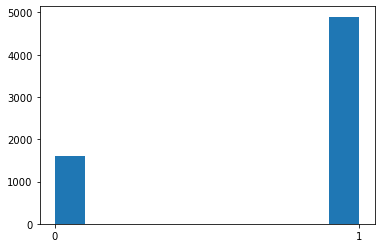

1    4898
0    1599
Name: type, dtype: int64


In [21]:
# 5.3 레드 와인과 화이트 와인에 대한 type 히스토그램 그리기
# for: 'red보다 white가 많다'는 가설 검증

import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [ ]:
# 그래프분석:
# 가설대로 red보다 white가 많음을 알 수 있다. 
# 정확한 수치를 알기위해: .value_counts()
#    --> 딥러닝 학습을 위해 훈련데이터와 테스트데이터로 나눠야되는데,
#        red와 white가 비슷한 '비율'로 들어가도록 랜덤하게 섞어야 함
#        red와 white의 정확한 수치를 알고 있으므로 어떤 '비율'로 섞을지 알 수 있음.

# 딥러닝 학습 전 해야할 일:
# 1. 데이터 전처리: 정규화
# 2. 훈련/테스트 데이터 나누기 위한 비율 계산

In [22]:
# 5.4 데이터 요약 정보 확인하기
# 외부에서 불러오는 데이터는 어떤 값으로 구성되어있는지 알기 어려움. 
#   --> 판다스 데이터파악하기: .info()
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [ ]:
# 내용분석: 
# 정규화할 때 데이터에 숫자가 아닌 다른 값이 들어가면 에러.
# 현재 wine은 (1) null값이 없고, (2) 모두 숫자이므로 정규화 可

In [25]:
# 5.5 데이터 정규화하기
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

'''
<표준화 vs 정규화>

1. 표준화(Standardization):
데이터가 평균을 기준으로 어느정도 떨어져있는지를 나타냄. 
Xnew = (X - 평균) / 표준편차

2. 정규화(Normalization):
데이터의 분포를 0~1로 조정.
Xnew = (X - 최솟값) / (최댓값 - 최솟값)
'''

display(wine_norm.head())
display(wine_norm.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0
4897,0.181818,0.086667,0.228916,0.003067,0.018272,0.072917,0.211982,0.044342,0.418605,0.056180,0.550725,0.500000,1.0


In [26]:
# 5.6 데이터를 섞은 후 넘파이 array로 변환하기
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
#.sample(frac= ):
#전체 df에서 frac인수로 지정된 비율의 행을 랜덤하게 뽑아서 새로운 df.
#frac=1 --> 100%를 뽑아서 섞는다.
display(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
#.to_numpy():
#df -> np
display(wine_np[:5])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
646,0.289256,0.393333,0.030120,0.046012,0.162791,0.017361,0.032258,0.194525,0.527132,0.230337,0.304348,0.333333,0.0
447,0.223140,0.220000,0.144578,0.205521,0.064784,0.079861,0.246544,0.213804,0.558140,0.174157,0.260870,0.500000,1.0
3636,0.223140,0.120000,0.234940,0.012270,0.018272,0.038194,0.138249,0.072874,0.410853,0.297753,0.478261,0.666667,1.0
1119,0.148760,0.386667,0.000000,0.029141,0.094684,0.020833,0.020737,0.105070,0.620155,0.202247,0.710145,0.333333,0.0
339,0.231405,0.066667,0.210843,0.013804,0.066445,0.166667,0.311060,0.121265,0.550388,0.353933,0.318841,0.666667,1.0


array([[0.2892562 , 0.39333333, 0.03012048, 0.04601227, 0.1627907 ,
        0.01736111, 0.03225806, 0.19452477, 0.52713178, 0.23033708,
        0.30434783, 0.33333333, 0.        ],
       [0.2231405 , 0.22      , 0.14457831, 0.20552147, 0.06478405,
        0.07986111, 0.24654378, 0.21380374, 0.55813953, 0.1741573 ,
        0.26086957, 0.5       , 1.        ],
       [0.2231405 , 0.12      , 0.23493976, 0.01226994, 0.01827243,
        0.03819444, 0.13824885, 0.07287449, 0.41085271, 0.29775281,
        0.47826087, 0.66666667, 1.        ],
       [0.14876033, 0.38666667, 0.        , 0.0291411 , 0.09468439,
        0.02083333, 0.02073733, 0.10507037, 0.62015504, 0.20224719,
        0.71014493, 0.33333333, 0.        ],
       [0.23140496, 0.06666667, 0.21084337, 0.01380368, 0.06644518,
        0.16666667, 0.31105991, 0.1212647 , 0.5503876 , 0.35393258,
        0.31884058, 0.66666667, 1.        ]])

In [27]:
# 5.7 훈련데이터와 테스트데이터 분리하기
# 검증데이터: 케라스-훈련데이터에서 일부를 떼서 자동으로 생성
# 추가) 학습을 위해 각 데이터를 X(입력), Y(출력)으로 분리하기 
import tensorflow as tf

train_idx = int(len(wine_np) * 0.8)
#80%에 해당하는 데이터를 뗄 계획.
#int값으로 index저장

#훈련데이터/테스트데이터 분리하기
#X: 12개의 기존속성; Y: 새롭게 추가했던 속성(type)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)

print(train_Y[0])
print(test_Y[0])

[0.2892562  0.39333333 0.03012048 0.04601227 0.1627907  0.01736111
 0.03225806 0.19452477 0.52713178 0.23033708 0.30434783 0.33333333]
0.0
[0.3553719  0.16666667 0.26506024 0.01380368 0.05481728 0.01736111
 0.01382488 0.16020821 0.48837209 0.21910112 0.39130435 0.33333333]
0.0
[1. 0.]
[1. 0.]
